# Pooling Layer

Visualize the output of maxpooling layer using four filtered(a.k.a. feature maps) of a convolutional layer.

### Import the image
Import the Necessary Packages

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

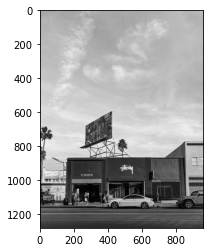

In [2]:
# image path
img_path = 'images/AA.JPG'

# load color image (cv2: bgr)
bgr_img = cv2.imread(img_path)
# convert to gray
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize scale to [0,1]
gray_img = gray_img.astype('float32')/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

## Create 4-Filters (vertical and horizontal)

Filter shape:  (4, 4)


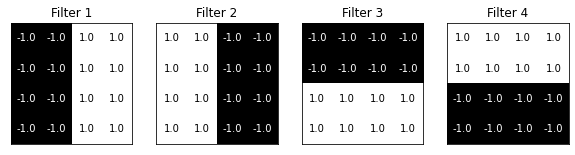

In [3]:
# used 4x4 filter
filter_vals = np.ones((4,4))
filter_vals[:,0:2] *= -1
# print(filter_vals)
print('Filter shape: ', filter_vals.shape)


# make four different filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# visualize four filters
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter {}'.format(str(i+1)))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]),
                        xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y] < 0 else 'black')

## Define a Network Architecture
For CNN and pooling layers
* Convolutional layers
* Maxpooling layers ([pooling layers documented here](https://pytorch.org/docs/stable/nn.html#pooling-layers), )


In [6]:
# CNN with a single convolutional layer with four filters

class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        
        # 1 input image channel(grayscale), 4 output channels/feature maps (filter)
        # 4x4 square convolution kernel
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
        # defin a 2D max pooling over an input signal composed of several input planes.
        # kernel_size = 4, stride = 4
        self.pool = nn.MaxPool2d(4, 4)
        
    # define the feedforward behavior
    def forward(self, x):
        # applies Convolutional layer with relu activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies Pooling Layer
        pooled_x = self.pool(activated_x)
        
        # return both layers
        return conv_x, activated_x, pooled_x


In [7]:
# instantiate the model ans set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


## Visualize the output of each filter

In [8]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

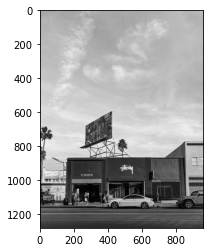

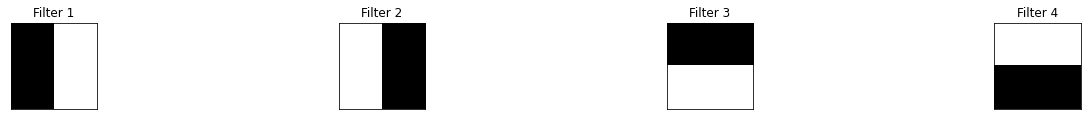

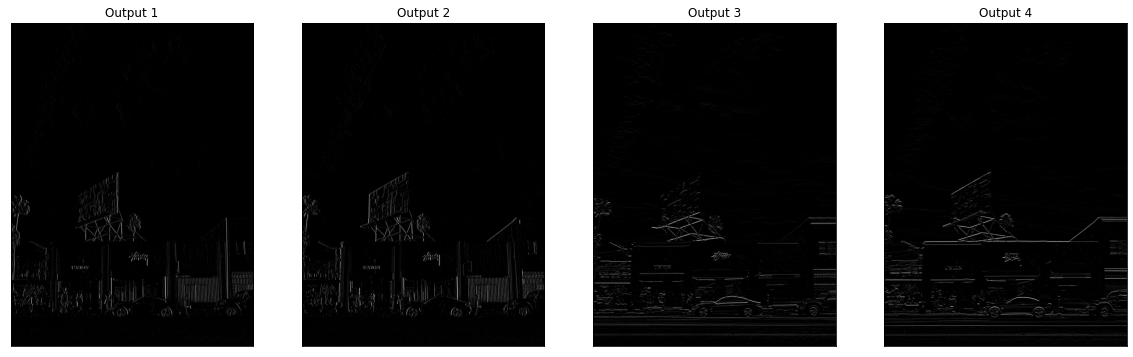

In [10]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation) , and pooling layer
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(activated_layer)

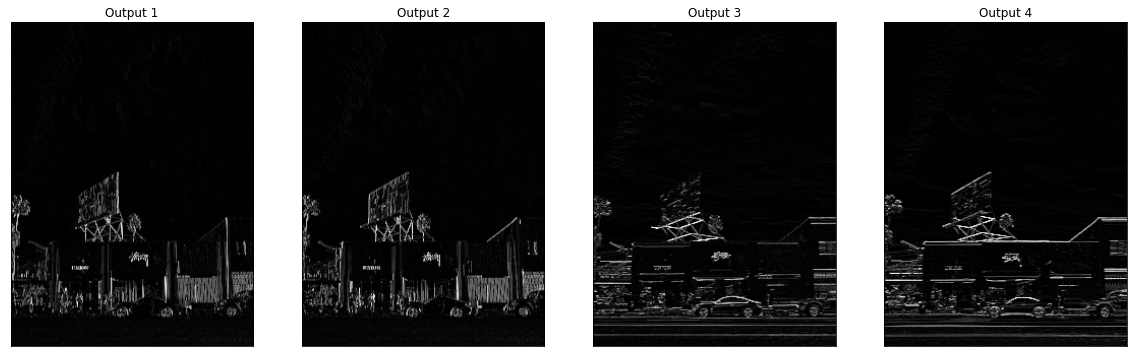

In [11]:
# visualize the output of an activated conv layer
viz_layer(pooled_layer)

As as result, the pooling layer maximized the brightest values in a given kernel area